In [2]:
import pandas as pd
import glob
import numpy as np
import json
import math
from natsort import natsorted

In [2]:
data = pd.read_json("/home/ravi/raviProject/DATA/Annotate/remaining_V5.json", orient='records')

In [3]:
data.shape

(2251110, 5)

In [5]:
data.head(5)

,msgDate,msg,replyDate,reply,telegramChannel
0,1625601315,Jen Psaki Warns Americans: ‘We Will Be Going D...,1625604365,FK off commie,TheTrumpRepublicans.json
1,1677992459,Because being mayor wasn't.,1677995455,Good server at a homeless shelter,ResisttheMainstream.json
2,1681423089,Going live now with @catturd2 tune in and ch...,1681485068,good day to all.,DonaldTrumpJr.json
3,1702760024,S a d l y T r u m p i s e i t h e r u ...,1702773525,"Sorry buddy, but religious ""fanatics"" of ANY r...",ThePatriotVoice.json
4,1641020167,I l i k e c o f f e e i n c o n c e p t,1641020222,kek,LacansWhreHouse.json


In [6]:
df = data.copy()

In [7]:
# Assuming df is your DataFrame
shuffled_df = df.sample(frac=1, random_state=42)  # Shuffle the DataFrame

# Sample a fraction of the DataFrame
sampled_df = shuffled_df.sample(n=100000, replace=False, random_state=42)

In [8]:
sampled_df.shape

(100000, 5)

In [9]:
sampled_df.head(5)

,msgDate,msg,replyDate,reply,telegramChannel
616027,1677869084,,1677869167,But CIVIL WAR will happen 1st,ResisttheMainstream.json
1410665,1652417709,"​ With Baby Formula Shortage, Pete Buttigieg F...",1652904626,His kids are at least a yr old now.,TrumpSupportersChannel.json
828345,1680718485,You don’t have to choose between what you buy ...,1680720428,Good post,DonaldTrumpJr.json
1303664,1658959141,"I s i t j u s t m e , o r d o e s ...",1658959618,🤣,ThePatriotVoice.json
797643,1694116233,Greg Gutfeld Predicts Ex-Dem Tulsi Gabbard Wil...,1694179761,No no no,TheTrumpRepublicans.json


In [10]:
sampled_df.to_json('/home/ravi/raviProject/DATA/Annotate/sampled_V6_100K.json', orient='records')

In [11]:
# sampled_df=pd.read_json('/home/ravi/raviProject/DATA/Annotate/sampled_V1.json', orient='records')
# # Save DataFrame as JSONL (JSON Lines)
# with open('/home/ravi/raviProject/DATA/Annotate/sampled_V1.jsonl', 'w') as f:
#     sampled_df.to_json(f, orient='records', lines=True)

In [12]:
remaining_df = shuffled_df.drop(sampled_df.index)

In [13]:
remaining_df.shape

(2151110, 5)

In [14]:
remaining_df.to_json('/home/ravi/raviProject/DATA/Annotate/remaining_V6.json', orient='records')

In [15]:
remaining_df.head(5)

,msgDate,msg,replyDate,reply,telegramChannel
2144695,1621531185,Coming to your city!! Pay attention. \n,1621532425,We Trump back right now,AnalyzingAmerica.json
664545,1666120220,,1666121082,cool 😀,DonaldTrumpJr.json
494190,1685195242,Major US Retailers Warn the Shoplifting Epidem...,1685199145,We in uk are encountering shoplifting on a gro...,TheTrumpRepublicans.json
2001645,1620231265,#AlexJonesShow LIVE: UN Announces Criminal Pl...,1620232443,Whoever talks about Covid-19 as a deadly disea...,InfoWars.json
69970,1650756035,W o u l d y o u ?,1650807458,Hello guys,AnalyzingAmerica.json


# sample ~100 per class wrt model predictions

In [5]:
df = pd.read_json('/home/ravi/raviProject/DATA/Annotate/LabelV6/sampled_V6_100K_yPred_RoBERTa_bs2_gradAcum8.json', orient='records')
df1 = pd.read_json('/home/ravi/raviProject/DATA/Annotate/LabelV6/sampled_V6_100K_yPred_RoBERTa_bs2_gradAcum4.json', orient='records')
df2 = pd.read_json('/home/ravi/raviProject/DATA/Annotate/LabelV6/sampled_V6_100K_yPred_RoBERTa_bs2_gradAcum2_steps16.json', orient='records')

In [6]:
df['y_pred'].value_counts(), df1['y_pred'].value_counts(), df2['y_pred'].value_counts()

(0    94661
 1     2713
 2     2626
 Name: y_pred, dtype: int64,
 0    93799
 2     3931
 1     2270
 Name: y_pred, dtype: int64,
 0    95208
 2     2747
 1     2045
 Name: y_pred, dtype: int64)

In [7]:
df.rename(columns={'y_pred': 'y_pred_bs2_gradcum8'}, inplace=True)
df['y_pred_bs2_gradAcum4']=df1['y_pred']
df['y_pred_bs2_gradAcum2_steps16']=df2['y_pred']

In [8]:
df.head(1)

,msgDate,msg,replyDate,text,telegramChannel,y_pred_bs2_gradcum8,y_pred_bs2_gradAcum4,y_pred_bs2_gradAcum2_steps16
0,1677869084,,1677869167,But CIVIL WAR will happen 1st,ResisttheMainstream.json,2,2,2


In [9]:
def determine_y_pred(row):
    labels = [row['y_pred_bs2_gradcum8'], row['y_pred_bs2_gradAcum4'], row['y_pred_bs2_gradAcum2_steps16']]
    unique_labels, counts = np.unique(labels, return_counts=True)
    
    if len(unique_labels) == 1:
        return unique_labels[0]
    elif 2 in counts:
        return unique_labels[np.argmax(counts)]
    else:
        return max(labels)

df['y_pred'] = df.apply(determine_y_pred, axis=1)

In [10]:
df.head(1)

,msgDate,msg,replyDate,text,telegramChannel,y_pred_bs2_gradcum8,y_pred_bs2_gradAcum4,y_pred_bs2_gradAcum2_steps16,y_pred
0,1677869084,,1677869167,But CIVIL WAR will happen 1st,ResisttheMainstream.json,2,2,2,2


In [11]:
df['y_pred'].value_counts()

0    94923
2     2875
1     2202
Name: y_pred, dtype: int64

In [12]:
# Sample 100 rows with class 1
sample_class_1 = df[df['y_pred'] == 0].sample(n=2539, random_state=42)

# Sample 200 rows with class 2
sample_class_2 = df[df['y_pred'] == 1].sample(n=2202, random_state=42)

# Sample 400 rows with class 3
sample_class_3 = df[df['y_pred'] == 2].sample(n=2875, random_state=42)

# Concatenate the sampled dataframes
sampled_df = pd.concat([sample_class_1, sample_class_2, sample_class_3])

# Shuffle the dataframe
sampled_df = sampled_df.sample(frac=1, random_state=42)

# Drop the sampled rows from the original DataFrame to get the remaining rows
remaining_data = df.drop(sampled_df.index)

In [13]:
# Print the first few rows to verify
sampled_df.head()

,msgDate,msg,replyDate,text,telegramChannel,y_pred_bs2_gradcum8,y_pred_bs2_gradAcum4,y_pred_bs2_gradAcum2_steps16,y_pred
18282,1639548491,"​ Dr. Scott Atlas – Fauci Undermined Trump, Mi...",1639570438,President Trump gave opportunity for those who...,TrumpSupportersChannel.json,0,0,0,0
68905,1664740852,"🔴 Teacher Suspected of Grooming, Raping Girls...",1664740984,"The reason, jail house justice!",ResisttheMainstream.json,1,1,1,1
82172,1662489632,🔴 Dem Lawmaker Who Just Won Senate Primary Re...,1662586707,You can run but you can’t hide from God !!,ResisttheMainstream.json,0,0,0,0
65977,1668368144,,1669666078,😡😡,DonaldTrumpJr.json,0,0,0,0
77159,1648595766,"A O C m a k e s $ 1 7 4 , 0 0 0 a y e ...",1648597337,Exactly!!,TheTrumpRepublicans.json,0,0,0,0


In [14]:
len(sampled_df), len(remaining_data)

(7616, 92384)

In [15]:
remaining_data.to_json('/home/ravi/raviProject/DATA/Annotate/LabelV6/sampled_V6_100K_yPred_RoBERTa_remaining92384.json', orient='records')
sampled_df.to_json('/home/ravi/raviProject/DATA/Annotate/LabelV6/sampled_V6_100K_yPred_RoBERTa_Sampled7616WithYpred.json', orient='records')
sampled_df = sampled_df.drop(columns=['y_pred', 'y_pred_bs2_gradcum8', 
                                      'y_pred_bs2_gradAcum4', 'y_pred_bs2_gradAcum2_steps16'])
sampled_df.to_csv('/home/ravi/raviProject/DATA/Annotate/LabelV6/sampled_V6_100K_yPred_RoBERTa_Sampled7616WithoutYpred.csv')

# Compare Labels

In [3]:
V6GPT=pd.read_json('/home/ravi/raviProject/DATA/Annotate/LabelV6/sampled_V6_100K_yPred_RoBERTa_Sampled7616WithYpred.json', orient='records')

In [4]:
V6GPT.shape

(7616, 9)

In [5]:
V6GPT.head(1)

,msgDate,msg,replyDate,text,telegramChannel,y_pred_bs2_gradcum8,y_pred_bs2_gradAcum4,y_pred_bs2_gradAcum2_steps16,y_pred
0,1639548491,"​ Dr. Scott Atlas – Fauci Undermined Trump, Mi...",1639570438,President Trump gave opportunity for those who...,TrumpSupportersChannel.json,0,0,0,0


In [6]:
V6GPT.tail(1)

,msgDate,msg,replyDate,text,telegramChannel,y_pred_bs2_gradcum8,y_pred_bs2_gradAcum4,y_pred_bs2_gradAcum2_steps16,y_pred
7615,1673838004,🔴 Ex-FBI Agent Weighs In on Idaho Murders Susp...,1673848988,"Incel or not, he need to be put to a quick death.",ResisttheMainstream.json,2,2,2,2


In [7]:
V6GPT['y_pred'].value_counts()

2    2875
0    2539
1    2202
Name: y_pred, dtype: int64

In [8]:
# Replace values in column 'FinalLabel'
replacement_dict = {0 : 1, 1 : 2, 2 : 3}
V6GPT['y_pred'] = V6GPT['y_pred'].replace(replacement_dict)
V6GPT['y_pred_bs2_gradcum8'] = V6GPT['y_pred_bs2_gradcum8'].replace(replacement_dict)
V6GPT['y_pred_bs2_gradAcum4'] = V6GPT['y_pred_bs2_gradAcum4'].replace(replacement_dict)
V6GPT['y_pred_bs2_gradAcum2_steps16'] = V6GPT['y_pred_bs2_gradAcum2_steps16'].replace(replacement_dict)

In [14]:
V6Ravi=pd.read_csv('/home/ravi/raviProject/DATA/Annotate/LabelV6/sampled_V6_100K_yPred_RoBERTa_Sampled7616WithoutYpred_LabelRavi.csv')

In [15]:
V6Ravi.shape

(7616, 7)

In [16]:
V6Ravi.head(1)

,Unnamed: 0,msgDate,msg,replyDate,text,telegramChannel,LabelRavi
0,18282,1639548491,"​ Dr. Scott Atlas – Fauci Undermined Trump, Mi...",1639570438,President Trump gave opportunity for those who...,TrumpSupportersChannel.json,1.0


In [17]:
V6Ravi.tail(1)

,Unnamed: 0,msgDate,msg,replyDate,text,telegramChannel,LabelRavi
7615,27541,1673838004,🔴 Ex-FBI Agent Weighs In on Idaho Murders Susp...,1673848988,"Incel or not, he need to be put to a quick death.",ResisttheMainstream.json,3.0


In [18]:
V6Ravi['LabelRavi'].value_counts()

1.0    2114
3.0    1967
2.0    1595
Name: LabelRavi, dtype: int64

In [19]:
V6Labels=V6GPT.copy()
V6Labels['RLabel']=V6Ravi['LabelRavi']
V6Labels = V6Labels.dropna(subset=['RLabel'], axis=0)
V6Labels['RLabel']=V6Labels['RLabel'].astype('int64')

In [20]:
V6Labels.shape

(5676, 10)

In [21]:
V6Labels['RLabel'].value_counts()

1    2114
3    1967
2    1595
Name: RLabel, dtype: int64

In [22]:
V6Labels.head(1)

,msgDate,msg,replyDate,text,telegramChannel,y_pred_bs2_gradcum8,y_pred_bs2_gradAcum4,y_pred_bs2_gradAcum2_steps16,y_pred,RLabel
0,1639548491,"​ Dr. Scott Atlas – Fauci Undermined Trump, Mi...",1639570438,President Trump gave opportunity for those who...,TrumpSupportersChannel.json,1,1,1,1,1


In [23]:
V6Labels.to_csv('/home/ravi/raviProject/DATA/Annotate/LabelV6/sampled_V6_100K_yPred_RoBERTa_Sampled5676WithYpred_RaviLabel.csv')

In [24]:
V6Labels.to_json('/home/ravi/raviProject/DATA/Annotate/LabelV6/sampled_V6_100K_yPred_RoBERTa_Sampled5676WithYprednRavi.json', orient='records')

## score

In [25]:
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report, f1_score, accuracy_score


In [26]:
def sample_per_class(df, sample_count):
    sampled_df = pd.DataFrame()
    remaining_df = df.copy()

    # Iterate over unique classes
    for class_label in df['RLabel'].unique():
        # Extract 100 rows where the column value is the current class label
        sampled_class_df = remaining_df[remaining_df['RLabel'] == class_label]
        sampled_class_df = sampled_class_df.sample(frac=1, random_state=42)
        sampled_class_df = sampled_class_df.head(sample_count)

        # Append sampled rows to the sampled_df DataFrame
        sampled_df = pd.concat([sampled_df, sampled_class_df], ignore_index=True)

        # Remove the sampled rows from the remaining_df
        remaining_df = remaining_df.drop(sampled_class_df.index)

    return sampled_df, remaining_df

In [101]:
df = V6Labels.copy()
sampled_df, remaining_df = sample_per_class(df, 100)

In [102]:
len(df), len(sampled_df), len(remaining_df)

(5676, 300, 5376)

In [103]:
sampled_df['RLabel'].value_counts()

1    100
2    100
3    100
Name: RLabel, dtype: int64

In [104]:
remaining_df['RLabel'].value_counts()

1    2014
3    1867
2    1495
Name: RLabel, dtype: int64

In [105]:
remaining_df.shape[0]

5376

In [106]:
sampled_df.head(1)

,msgDate,msg,replyDate,text,telegramChannel,y_pred_bs2_gradcum8,y_pred_bs2_gradAcum4,y_pred_bs2_gradAcum2_steps16,y_pred,RLabel
0,1628311477,L i k e l y t h e r e a l r e a s o n ...,1628340337,Well done good and faithful servant. May God ...,PatriotStreetfighter.json,1,1,1,1,1


In [107]:
kappa = cohen_kappa_score(sampled_df['RLabel'], sampled_df['y_pred_bs2_gradAcum2_steps16'])

In [108]:
kappa

0.735

In [109]:
weighted_f1 = f1_score(sampled_df['RLabel'], sampled_df['y_pred_bs2_gradAcum2_steps16'], average='weighted')

In [110]:
weighted_f1

0.8204821213742317

In [111]:
acc = accuracy_score(sampled_df['RLabel'], sampled_df['y_pred_bs2_gradAcum2_steps16'])

In [112]:
acc

0.8233333333333334

In [113]:
# Generate classification report
class_report = classification_report(sampled_df['RLabel'], sampled_df['y_pred_bs2_gradAcum2_steps16'])

In [114]:
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           1       0.81      0.69      0.75       100
           2       0.82      0.91      0.86       100
           3       0.84      0.87      0.85       100

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



In [115]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

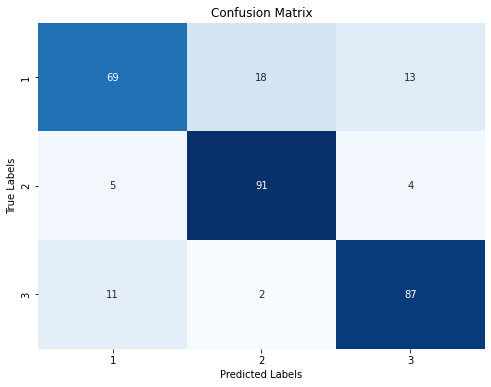

In [116]:
conf_matrix=confusion_matrix(sampled_df['RLabel'], sampled_df['y_pred_bs2_gradAcum2_steps16'])
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Set the tick labels to match your class labels (1, 2, 3)
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=[1, 2, 3])
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=[1, 2, 3])

plt.show()

In [117]:
sampled_df.to_json('/home/ravi/raviProject/DATA/Annotate/LabelV6/V6_Labeled_300_sampled.json', orient='records')
remaining_df.to_json('/home/ravi/raviProject/DATA/Annotate/LabelV6/V6_Labeled_5376_remaining.json', orient='records')

# MERGE with previous labeled set

### combine all - full labeled set

In [3]:
V1Labels = pd.read_json('/home/ravi/raviProject/DATA/Annotate/LabelV1/sampled_V1_10K_Experts_Sampled487WithMattnRavi.json', orient='records')
V2Labels = pd.read_json('/home/ravi/raviProject/DATA/Annotate/LabelV2/sampled_V2_10K_yPred_RoBERTa_Sampled1457WithYprednRavi.json', orient='records')
V3Labels = pd.read_json('/home/ravi/raviProject/DATA/Annotate/LabelV3/sampled_V3_10K_yPred_RoBERTa_Sampled1404WithYprednRavi.json', orient='records')
V4Labels = pd.read_json('/home/ravi/raviProject/DATA/Annotate/LabelV4/sampled_V4_10K_yPred_RoBERTa_Sampled1044WithYprednRavi.json', orient='records')
V5Labels = pd.read_json('/home/ravi/raviProject/DATA/Annotate/LabelV5/sampled_V5_10K_yPred_RoBERTa_Sampled853WithYprednRavi.json', orient='records')
V6Labels = pd.read_json('/home/ravi/raviProject/DATA/Annotate/LabelV6/sampled_V6_100K_yPred_RoBERTa_Sampled5676WithYprednRavi.json', orient='records')

In [10]:
V1Labels.head(1)

,Unnamed: 0,id,text,msg,msgDate,replyDate,comparison_MJ,telegramChannel,label,LabelM,LabelR,Agree?,FinalLabel
0,3,41,She needs to strike that big fat mouth,This would be another win for Republicans.\n,1651779040,1651806800,True,AnalyzingAmerica.json,['No threat / Ambiguous'],3,3,Equal,1


In [11]:
V2Labels.rename(columns={'RLabel': 'FinalLabel'}, inplace=True)
V3Labels.rename(columns={'RLabel': 'FinalLabel'}, inplace=True)
V4Labels.rename(columns={'RLabel': 'FinalLabel'}, inplace=True)
V5Labels.rename(columns={'RLabel': 'FinalLabel'}, inplace=True)
V6Labels.rename(columns={'RLabel': 'FinalLabel'}, inplace=True)

In [12]:
print(V1Labels.shape, '\n', V1Labels['FinalLabel'].value_counts())
print(V2Labels.shape, '\n', V2Labels['FinalLabel'].value_counts())
print(V3Labels.shape, '\n', V3Labels['FinalLabel'].value_counts())
print(V4Labels.shape, '\n', V4Labels['FinalLabel'].value_counts())
print(V5Labels.shape, '\n', V5Labels['FinalLabel'].value_counts())
print(V6Labels.shape, '\n', V6Labels['FinalLabel'].value_counts())

(487, 13) 
 1    207
3    171
2    109
Name: FinalLabel, dtype: int64
(1457, 7) 
 1    1185
2     152
3     120
Name: FinalLabel, dtype: int64
(1404, 7) 
 1    1094
3     176
2     134
Name: FinalLabel, dtype: int64
(1044, 7) 
 1    746
3    162
2    136
Name: FinalLabel, dtype: int64
(853, 9) 
 1    505
3    190
2    158
Name: FinalLabel, dtype: int64
(5676, 10) 
 1    2114
3    1967
2    1595
Name: FinalLabel, dtype: int64


In [13]:
selected_cols =['msgDate', 'msg', 'replyDate', 'text', 'telegramChannel', 'FinalLabel']
merged_df = pd.concat([V1Labels[selected_cols], V2Labels[selected_cols], 
                       V3Labels[selected_cols], V4Labels[selected_cols],
                       V5Labels[selected_cols], V6Labels[selected_cols]], ignore_index=True)

In [14]:
# Replace values in column 'FinalLabel'
replacement_dict = {1 : 0, 2 : 1, 3 : 2}
merged_df['FinalLabel'] = merged_df['FinalLabel'].replace(replacement_dict)

In [15]:
merged_df.shape

(10921, 6)

In [16]:
merged_df['FinalLabel'].value_counts()

0    5851
2    2786
1    2284
Name: FinalLabel, dtype: int64

In [17]:
shuffled_df = merged_df.sample(frac=1, random_state=42)  # Shuffle the DataFrame

In [18]:
shuffled_df.head()

,msgDate,msg,replyDate,text,telegramChannel,FinalLabel
1110,1692927979,DONALDJTRUMP.COM,1692928100,I believe that’s exactly what the Democrats ar...,TrumpSupportersChannel.json,0
9552,1646855824,J e n P s a k i : \n \n S i n c e P u t ...,1646943759,Fuck murderous Nazi scumbag biden \nThis cocks...,TheTrumpRepublicans.json,2
5239,1677514811,🔴 Ted Cruz Calls for Senate Investigation Into...,1677594718,Just what we need; more investigations,ResisttheMainstream.json,1
3532,1707155342,Senate Leader Schumer: US Troops Could Be Sent...,1707160474,chucky needs his face bashed in .period,InfoWars.json,2
7254,1633132241,Let’s make sure it happens!\n,1633135045,And so is America! Time for Revolution ….rest...,AnalyzingAmerica.json,0


In [19]:
shuffled_df.to_json('/home/ravi/raviProject/DATA/Annotate/iterData/iter6_Labeled_10921_sampled_ALL.json', orient='records')

## make new iter4 labeled data

In [20]:
df5 = pd.read_json('/home/ravi/raviProject/DATA/Annotate/iterData/iter6_Labeled_10921_sampled_ALL.json', orient='records')

In [21]:
df5['FinalLabel'].value_counts()

0    5851
2    2786
1    2284
Name: FinalLabel, dtype: int64

In [22]:
# Sample 100 rows with class 1
sample_class_1 = df5[df5['FinalLabel'] == 0].sample(n=2535, random_state=42)

# Sample 200 rows with class 2
sample_class_2 = df5[df5['FinalLabel'] == 1].sample(n=2284, random_state=42)

# Sample 400 rows with class 3
sample_class_3 = df5[df5['FinalLabel'] == 2].sample(n=2786, random_state=42)

# Concatenate the sampled dataframes
sampled_df = pd.concat([sample_class_1, sample_class_2, sample_class_3])

# Shuffle the dataframe
sampled_df = sampled_df.sample(frac=1, random_state=42)

# Drop the sampled rows from the original DataFrame to get the remaining rows
remaining_data = df5.drop(sampled_df.index)

In [23]:
len(sampled_df), len(remaining_data)

(7605, 3316)

In [24]:
sampled_df.to_json('/home/ravi/raviProject/DATA/Annotate/LabelV6/V6_ALLLabeled_7605_sampled.json', orient='records')
remaining_data.to_json('/home/ravi/raviProject/DATA/Annotate/LabelV6/V6_ALLLabeled_3316_remaining.json', orient='records')

In [25]:
sampled_df.to_json('/home/ravi/raviProject/DATA/Annotate/iterData/iter6_Labeled_7605_sampled_forNextIter.json', orient='records')